In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Accuracy: 0.7951219512195122
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Confusion Matrix:
 [[73 29]
 [13 90]]


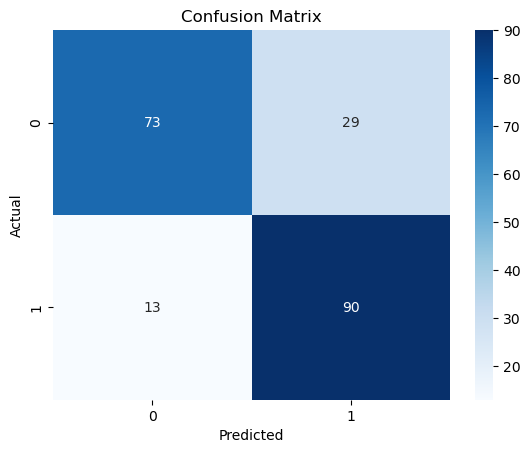

In [11]:
#Heart Disease Diagnostic Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#'heart.csv' downloaded from kaggle
df = pd.read_csv('heart.csv')

# Display first few rows
display(df.head())

# Input Schema (Feature Explanation)
input_schema = {
    'age': 'int',
    'sex': 'binary (0 = female, 1 = male)',
    'cp': 'categorical (0-3, chest pain type)',
    'trestbps': 'int, resting blood pressure',
    'chol': 'int, serum cholesterol',
    'fbs': 'binary (0 = false, 1 = true, fasting blood sugar > 120 mg/dl)',
    'restecg': 'categorical (0-2, resting electrocardiographic results)',
    'thalach': 'int, maximum heart rate achieved',
    'exang': 'binary (0 = no, 1 = yes, exercise-induced angina)',
    'oldpeak': 'float, ST depression induced by exercise',
    'slope': 'categorical (0-2, slope of peak exercise ST segment)',
    'ca': 'int, number of major vessels colored by fluoroscopy',
    'thal': 'categorical (0-3, thalassemia type)',
    'target': 'binary (0 = No Heart Disease, 1 = Heart Disease)'
}

# Splitting data
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Output Schema
output_schema = {
    'prediction': 'binary (0 = No Heart Disease, 1 = Heart Disease)'
}

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("tobacco_mortality_data.csv")  # Update with correct filename

# Display available columns
print("Columns in dataset:", df.columns.tolist())

# Rename columns (update as per actual column names)
df = df.rename(columns={
    'Tobacco_Use': 'Smoking_Prevalence',  # Change if different in your dataset
    'Death_Rate': 'Mortality_Rate',       # Change if different in your dataset
    'Year': 'Year'
})

# Keep only necessary columns
required_columns = ['Year', 'Smoking_Prevalence', 'Mortality_Rate']
df = df[required_columns]

# Convert columns to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Smoking_Prevalence'] = pd.to_numeric(df['Smoking_Prevalence'], errors='coerce')
df['Mortality_Rate'] = pd.to_numeric(df['Mortality_Rate'], errors='coerce')

# Filter for the years 2004-2015
df_filtered = df[(df['Year'] >= 2004) & (df['Year'] <= 2015)].dropna()

# Check the cleaned data
print(df_filtered.head())

# 📊 PLOT: Smoking Prevalence vs. Mortality Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='Year', y='Smoking_Prevalence', marker='o', label="Smoking Prevalence (%)")
sns.lineplot(data=df_filtered, x='Year', y='Mortality_Rate', marker='s', label="Mortality Rate (per 100,000)")

plt.title("Tobacco Use and Mortality Trends (2004-2015)")
plt.xlabel("Year")
plt.ylabel("Percentage / Rate")
plt.legend()
plt.grid(True)
plt.show()


Columns in dataset: ['Year', 'ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric', 'Sex', 'Value']


KeyError: "['Smoking_Prevalence', 'Mortality_Rate'] not in index"

In [87]:
print(df['Metric'].unique())


['Number of admissions' 'Attributable number']


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function BEFORE calling it
def load_data(file_path):
    """Load crop production data from a CSV file."""
    return pd.read_csv(file_path)

# Now call the function
df = load_data("crop_yield.csv")  # Ensure the file exists in the working directory

# Continue with the rest of the processing...
def preprocess_data(df):
    df.dropna(inplace=True)
    return df

df = preprocess_data(df)  # Call the function after defining it

print(df.head())  # Check if data is loaded properly


           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


In [101]:
def total_production_by_state(df):
    """Calculate total production by state."""
    return df.groupby('State_Name')['Production'].sum().sort_values(ascending=False)

def total_production_by_crop(df):
    """Calculate total production by crop."""
    return df.groupby('Crop')['Production'].sum().sort_values(ascending=False)


In [103]:
print("Total Production by State:")
print(total_production_by_state(df).head(10))

print("\nTotal Production by Crop:")
print(total_production_by_crop(df).head(10))


Total Production by State:


KeyError: 'State_Name'

In [105]:
def visualize_data(df):
    """Generate bar plots for state-wise and crop-wise production."""
    plt.figure(figsize=(10, 5))
    
    # Top 10 States by Production
    state_production = total_production_by_state(df).head(10)
    sns.barplot(x=state_production.values, y=state_production.index, palette='viridis')
    plt.xlabel("Total Production")
    plt.ylabel("State")
    plt.title("Top 10 States by Crop Production")
    plt.show()
    
    # Top 10 Crops by Production
    plt.figure(figsize=(10, 5))
    crop_production = total_production_by_crop(df).head(10)
    sns.barplot(x=crop_production.values, y=crop_production.index, palette='magma')
    plt.xlabel("Total Production")
    plt.ylabel("Crop")
    plt.title("Top 10 Crops by Production")
    plt.show()

# Call visualization function
visualize_data(df)


KeyError: 'State_Name'

<Figure size 1000x500 with 0 Axes>